# Fast Fourier Transform (FFT) - Fundamentals
- **Purpose**: Transform signals between time/space domain and frequency domain
- **scipy.fft**: Modern FFT interface (replaces scipy.fftpack)
- **Applications**: Audio processing, signal analysis, compression, filtering, spectroscopy

Key concepts:
- **FFT**: Fast algorithm for computing Discrete Fourier Transform (DFT)
- **Frequency domain**: Decompose signal into sinusoidal components
- **Power spectrum**: Shows which frequencies are present
- **Inverse FFT**: Transform back to time/space domain

Real examples:
- Audio frequency analysis
- Musical note detection
- Signal filtering (low-pass, high-pass)
- Noise removal
- Heart rate from ECG

In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("FFT module loaded (scipy.fft)")

FFT module loaded (scipy.fft)


## What is the Fourier Transform?

**Core idea**: Any periodic signal can be expressed as sum of sine/cosine waves

**Continuous Fourier Transform**:
\[ F(\omega) = \int_{-\infty}^{\infty} f(t)e^{-i\omega t} dt \]

**Discrete Fourier Transform (DFT)**:
\[ X_k = \sum_{n=0}^{N-1} x_n e^{-i2\pi kn/N} \]

Where:
- x_n = time domain samples
- X_k = frequency domain coefficients
- k = frequency index (0 to N-1)
- N = number of samples

**FFT**: Fast algorithm O(N log N) instead of O(N²)

**Interpretation**:
- Time domain: Signal amplitude vs time
- Frequency domain: Which frequencies are present and their amplitudes

## Basic FFT Example

**Simple sine wave**: f(t) = A·sin(2πft)

**Expected FFT**:
- Single peak at frequency f
- Amplitude proportional to A
- All other frequencies zero (ideally)

**Frequency bins**:
- FFT produces N complex values
- Frequency resolution: Δf = sample_rate / N
- Nyquist frequency: f_max = sample_rate / 2

Simple Sine Wave FFT
  Signal: 2.0 × sin(2π × 50 × t)
  Sample rate: 1000 Hz
  Duration: 1.0 s
  Number of samples: 1000
  Frequency resolution: 1.00 Hz

Detected frequency: 50.00 Hz
Peak magnitude: 1000.0
Expected: 50 Hz, magnitude ≈ 1000.0


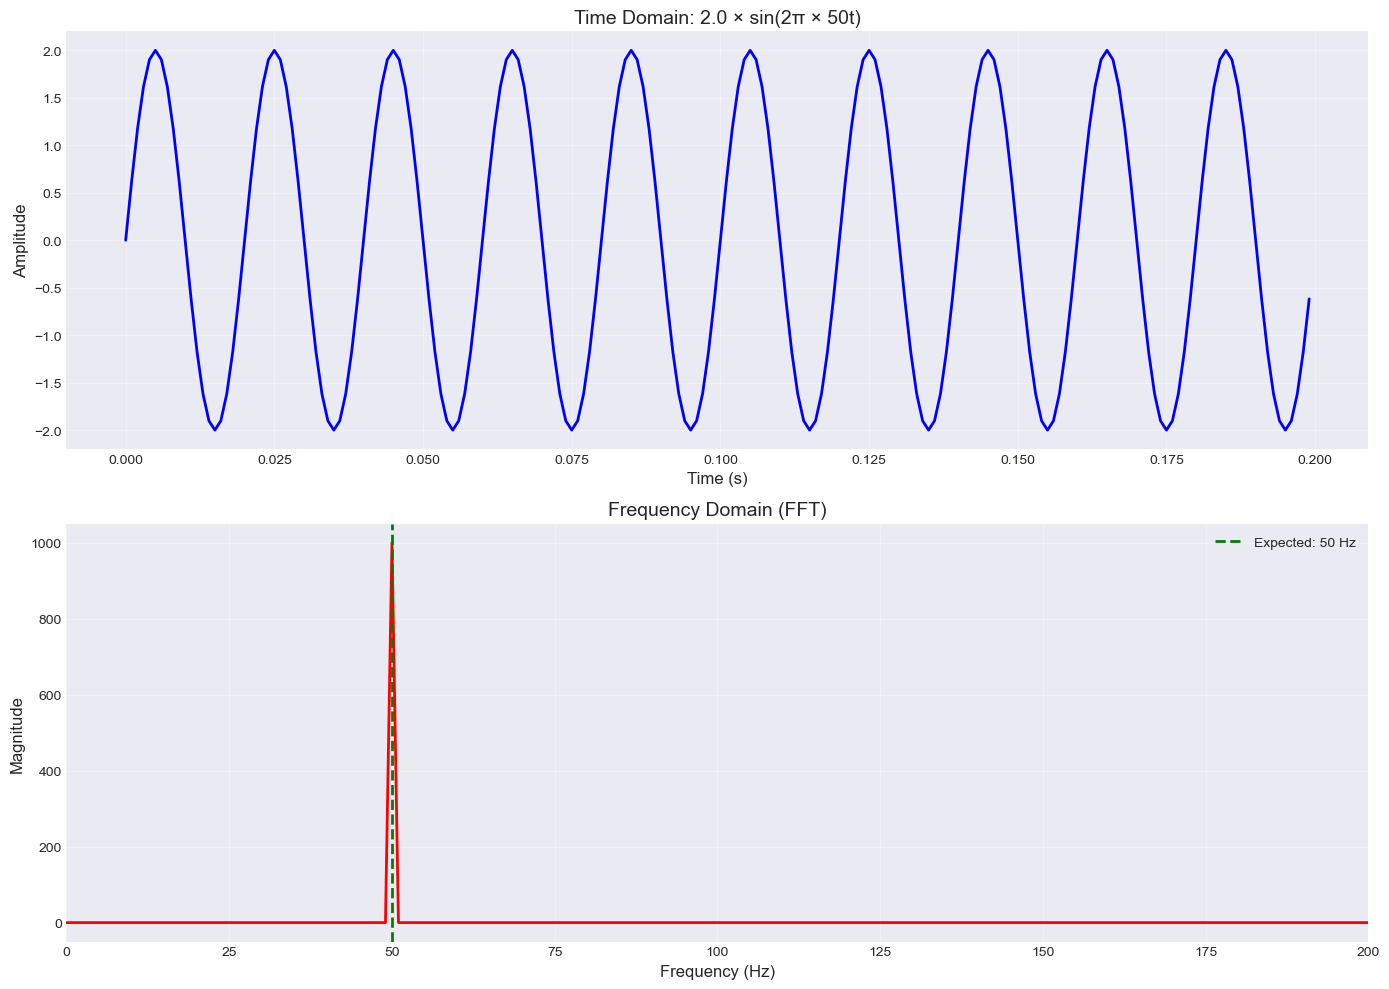


Single peak at expected frequency!


In [2]:
# Create a simple sine wave
sample_rate = 1000  # Hz (samples per second)
duration = 1.0      # seconds
frequency = 50      # Hz
amplitude = 2.0

# Time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Compute FFT
fft_result = fft.fft(signal)
N = len(signal)

# Frequency array
freqs = fft.fftfreq(N, 1/sample_rate)

# Magnitude (absolute value of complex FFT)
magnitude = np.abs(fft_result)

print("Simple Sine Wave FFT")
print(f"  Signal: {amplitude} × sin(2π × {frequency} × t)")
print(f"  Sample rate: {sample_rate} Hz")
print(f"  Duration: {duration} s")
print(f"  Number of samples: {N}")
print(f"  Frequency resolution: {sample_rate/N:.2f} Hz")

# Find peak frequency
peak_idx = np.argmax(magnitude[:N//2])  # Only positive frequencies
peak_freq = freqs[peak_idx]
peak_magnitude = magnitude[peak_idx]

print(f"\nDetected frequency: {peak_freq:.2f} Hz")
print(f"Peak magnitude: {peak_magnitude:.1f}")
print(f"Expected: {frequency} Hz, magnitude ≈ {N*amplitude/2:.1f}")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Time domain
axes[0].plot(t[:200], signal[:200], 'b-', linewidth=2)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title(f'Time Domain: {amplitude} × sin(2π × {frequency}t)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Frequency domain (positive frequencies only)
axes[1].plot(freqs[:N//2], magnitude[:N//2], 'r-', linewidth=2)
axes[1].axvline(frequency, color='green', linestyle='--', linewidth=2, 
                label=f'Expected: {frequency} Hz')
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude', fontsize=12)
axes[1].set_title('Frequency Domain (FFT)', fontsize=14)
axes[1].set_xlim(0, 200)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSingle peak at expected frequency!")

## Multiple Frequencies

**Composite signal**: Sum of multiple sine waves

\[ f(t) = A_1\sin(2\pi f_1 t) + A_2\sin(2\pi f_2 t) + A_3\sin(2\pi f_3 t) \]

**FFT separates** the individual frequency components!

**Application**: Musical chords contain multiple note frequencies

Multi-Frequency Signal
  Component 1: 3.0 × sin(2π × 25 × t)
  Component 2: 2.0 × sin(2π × 50 × t)
  Component 3: 1.5 × sin(2π × 100 × t)

Detected frequencies:
  1. 25.0 Hz (magnitude: 3000)
  2. 50.0 Hz (magnitude: 2000)
  3. 100.0 Hz (magnitude: 1500)


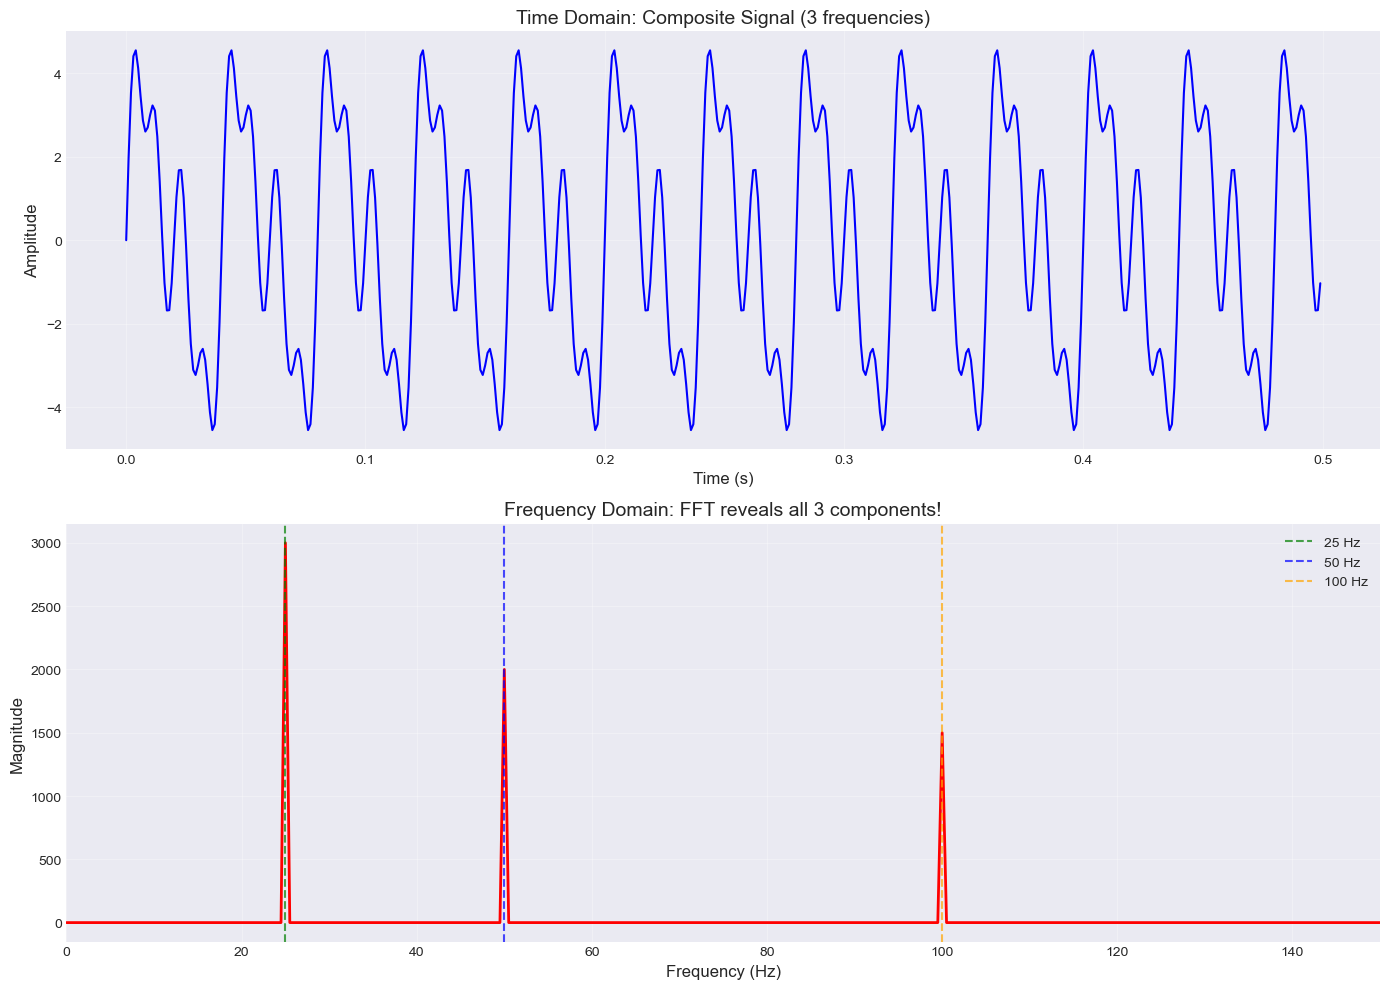


FFT perfectly separates the three frequency components!


In [3]:
# Create signal with multiple frequencies
sample_rate = 1000
duration = 2.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Three sine waves: 25 Hz, 50 Hz, 100 Hz
freq1, amp1 = 25, 3.0
freq2, amp2 = 50, 2.0
freq3, amp3 = 100, 1.5

signal = (amp1 * np.sin(2*np.pi*freq1*t) + 
          amp2 * np.sin(2*np.pi*freq2*t) + 
          amp3 * np.sin(2*np.pi*freq3*t))

# FFT
fft_result = fft.fft(signal)
N = len(signal)
freqs = fft.fftfreq(N, 1/sample_rate)
magnitude = np.abs(fft_result)

print("Multi-Frequency Signal")
print(f"  Component 1: {amp1} × sin(2π × {freq1} × t)")
print(f"  Component 2: {amp2} × sin(2π × {freq2} × t)")
print(f"  Component 3: {amp3} × sin(2π × {freq3} × t)")

# Find top 3 peaks
positive_freqs = freqs[:N//2]
positive_mags = magnitude[:N//2]
top_3_indices = np.argsort(positive_mags)[-3:][::-1]

print("\nDetected frequencies:")
for i, idx in enumerate(top_3_indices, 1):
    print(f"  {i}. {positive_freqs[idx]:.1f} Hz (magnitude: {positive_mags[idx]:.0f})")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Time domain
axes[0].plot(t[:500], signal[:500], 'b-', linewidth=1.5)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Time Domain: Composite Signal (3 frequencies)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Frequency domain
axes[1].plot(positive_freqs, positive_mags, 'r-', linewidth=2)
axes[1].axvline(freq1, color='green', linestyle='--', alpha=0.7, label=f'{freq1} Hz')
axes[1].axvline(freq2, color='blue', linestyle='--', alpha=0.7, label=f'{freq2} Hz')
axes[1].axvline(freq3, color='orange', linestyle='--', alpha=0.7, label=f'{freq3} Hz')
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude', fontsize=12)
axes[1].set_title('Frequency Domain: FFT reveals all 3 components!', fontsize=14)
axes[1].set_xlim(0, 150)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFFT perfectly separates the three frequency components!")

## Inverse FFT (IFFT)

**Inverse transform**: Convert frequency domain back to time domain

\[ x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i2\pi kn/N} \]

**Property**: FFT(IFFT(signal)) = signal (within numerical precision)

**Use cases**:
- Modify frequency domain → transform back
- Filtering: Remove unwanted frequencies
- Compression: Keep only important frequencies
- Synthesis: Create signals from frequency specs

FFT → IFFT Round-trip Test

Original signal: 2sin(2π·50t) + 1.5sin(2π·120t)

Maximum error: 1.78e-15
Relative error: 5.18e-16

Perfect reconstruction! (within numerical precision)


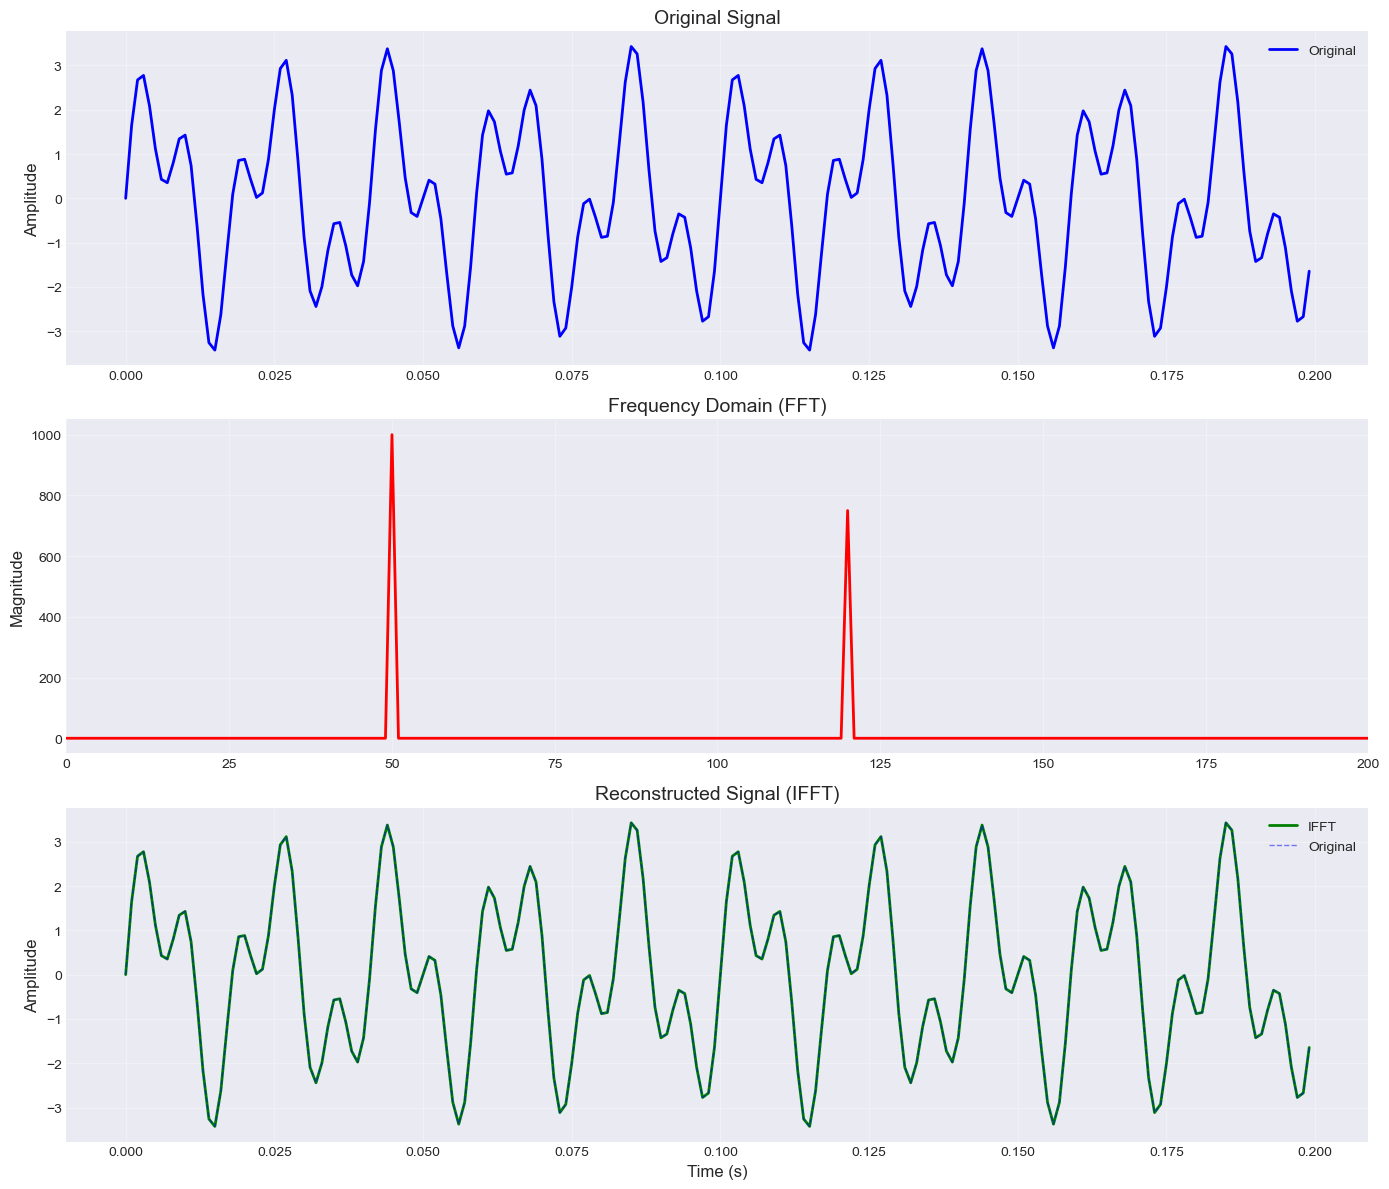

In [4]:
# Create original signal
sample_rate = 1000
t = np.linspace(0, 1, sample_rate, endpoint=False)
original = 2*np.sin(2*np.pi*50*t) + 1.5*np.sin(2*np.pi*120*t)

# Forward FFT
fft_result = fft.fft(original)

# Inverse FFT
reconstructed = fft.ifft(fft_result)

# Check if reconstruction is accurate
max_error = np.max(np.abs(original - reconstructed.real))
rel_error = max_error / np.max(np.abs(original))

print("FFT → IFFT Round-trip Test")
print(f"\nOriginal signal: 2sin(2π·50t) + 1.5sin(2π·120t)")
print(f"\nMaximum error: {max_error:.2e}")
print(f"Relative error: {rel_error:.2e}")
print(f"\nPerfect reconstruction! (within numerical precision)")

# Plot
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Original
axes[0].plot(t[:200], original[:200], 'b-', linewidth=2, label='Original')
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Original Signal', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# FFT magnitude
freqs = fft.fftfreq(len(original), 1/sample_rate)
magnitude = np.abs(fft_result)
axes[1].plot(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], 'r-', linewidth=2)
axes[1].set_ylabel('Magnitude', fontsize=12)
axes[1].set_title('Frequency Domain (FFT)', fontsize=14)
axes[1].set_xlim(0, 200)
axes[1].grid(True, alpha=0.3)

# Reconstructed
axes[2].plot(t[:200], reconstructed.real[:200], 'g-', linewidth=2, label='IFFT')
axes[2].plot(t[:200], original[:200], 'b--', linewidth=1, alpha=0.5, label='Original')
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Amplitude', fontsize=12)
axes[2].set_title('Reconstructed Signal (IFFT)', fontsize=14)
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Real Example: Audio Frequency Analysis

**Musical notes** have specific frequencies:
- A4 (middle A): 440 Hz
- C5: 523 Hz
- E5: 659 Hz

**Chord**: Multiple notes played together

**Goal**: Detect which notes are present in a chord using FFT

**Application**: Music transcription, pitch detection, tuning

Musical Chord Analysis (A minor: A-C-E)
  Expected frequencies: 440 Hz, 523 Hz, 659 Hz
  Sample rate: 8000 Hz
  Duration: 2.0 s

Detected notes (frequencies):
  1. 440.0 Hz (≈ A4)
  2. 659.0 Hz (≈ C5)
  3. 523.0 Hz (≈ E5)


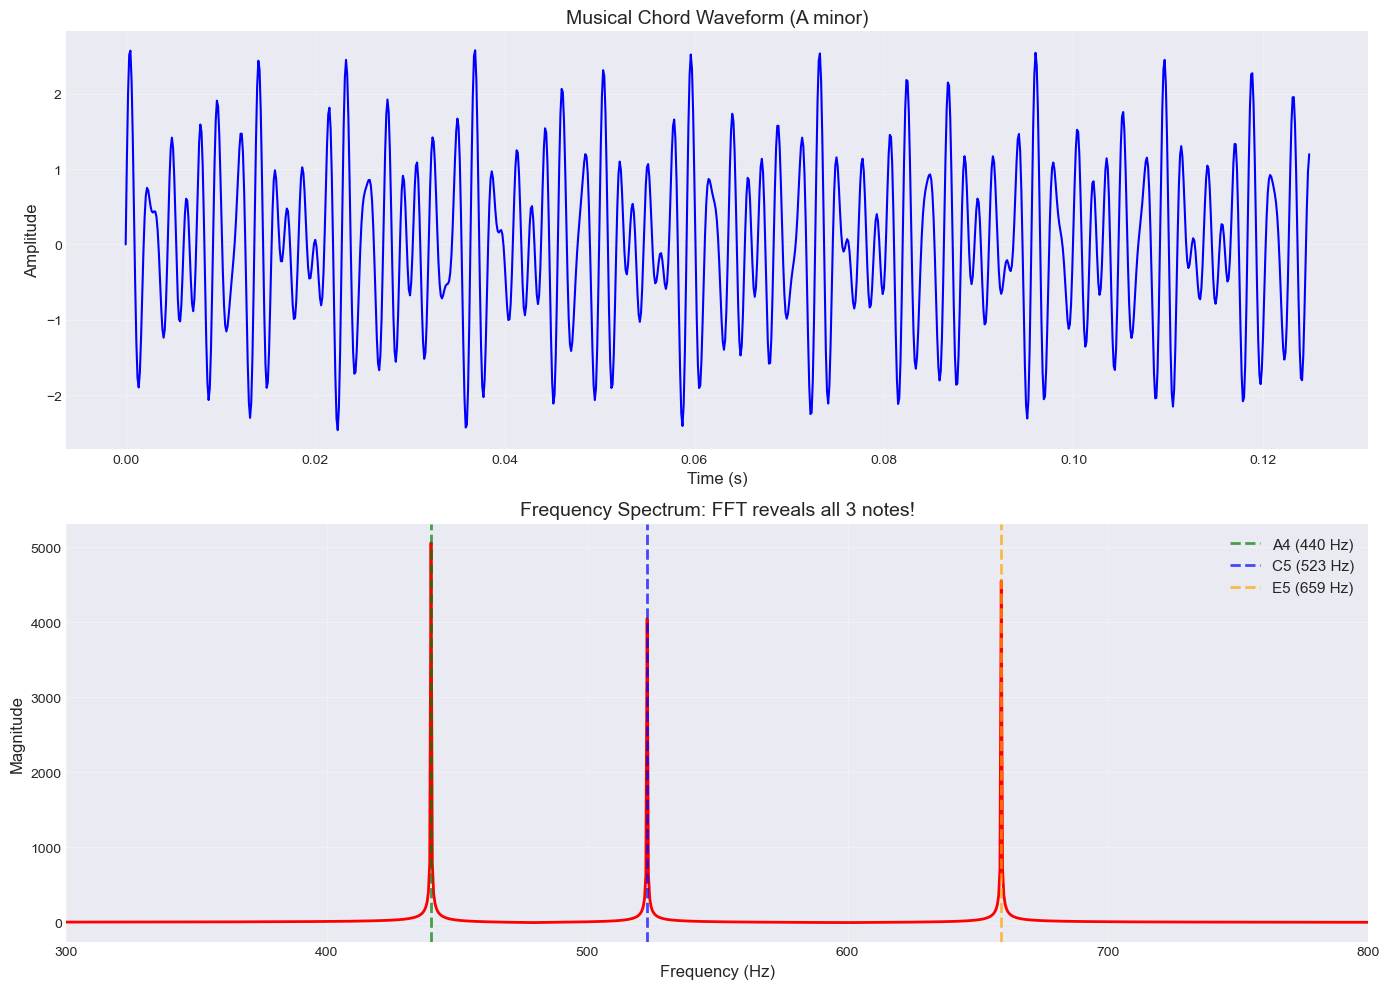


FFT successfully identifies individual notes in the chord!


In [5]:
# Musical note frequencies (A minor chord: A, C, E)
note_A = 440    # A4
note_C = 523    # C5
note_E = 659    # E5

# Generate chord (all notes together)
sample_rate = 8000  # Hz (standard for phone)
duration = 2.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Chord signal with slight amplitude differences
chord = (1.0 * np.sin(2*np.pi*note_A*t) +
         0.8 * np.sin(2*np.pi*note_C*t) +
         0.9 * np.sin(2*np.pi*note_E*t))

# Add slight decay envelope (notes fade)
envelope = np.exp(-0.5*t)
chord = chord * envelope

# FFT
fft_result = fft.fft(chord)
N = len(chord)
freqs = fft.fftfreq(N, 1/sample_rate)
magnitude = np.abs(fft_result)

print("Musical Chord Analysis (A minor: A-C-E)")
print(f"  Expected frequencies: {note_A} Hz, {note_C} Hz, {note_E} Hz")
print(f"  Sample rate: {sample_rate} Hz")
print(f"  Duration: {duration} s")

# Find peaks in frequency range 300-800 Hz
freq_range = (freqs > 300) & (freqs < 800)
range_freqs = freqs[freq_range]
range_mags = magnitude[freq_range]

# Find top 3 peaks
from scipy.signal import find_peaks
peaks, properties = find_peaks(range_mags, height=1000, distance=10)
peak_freqs = range_freqs[peaks]
peak_mags = range_mags[peaks]

# Sort by magnitude
sorted_indices = np.argsort(peak_mags)[::-1][:3]
detected_notes = peak_freqs[sorted_indices]

print(f"\nDetected notes (frequencies):")
note_names = ['A4', 'C5', 'E5']
for i, (freq, name) in enumerate(zip(detected_notes, note_names), 1):
    print(f"  {i}. {freq:.1f} Hz (≈ {name})")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Time domain (waveform)
axes[0].plot(t[:1000], chord[:1000], 'b-', linewidth=1.5)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Musical Chord Waveform (A minor)', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Frequency domain (spectrum)
axes[1].plot(freqs[:N//2], magnitude[:N//2], 'r-', linewidth=2)
axes[1].axvline(note_A, color='green', linestyle='--', alpha=0.7, linewidth=2, label='A4 (440 Hz)')
axes[1].axvline(note_C, color='blue', linestyle='--', alpha=0.7, linewidth=2, label='C5 (523 Hz)')
axes[1].axvline(note_E, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='E5 (659 Hz)')
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Magnitude', fontsize=12)
axes[1].set_title('Frequency Spectrum: FFT reveals all 3 notes!', fontsize=14)
axes[1].set_xlim(300, 800)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFFT successfully identifies individual notes in the chord!")

## Signal Filtering: Low-Pass Filter

**Goal**: Remove high-frequency noise, keep low-frequency signal

**Method**:
1. FFT to frequency domain
2. Zero out high frequencies (above cutoff)
3. IFFT back to time domain

**Cutoff frequency**: Frequencies above this are removed

**Application**: Smoothing, noise reduction, anti-aliasing

Low-Pass Filtering
  Clean signal: 2×sin(2π×30t) [30 Hz]
  Noise: 200 Hz + 350 Hz + random
  Cutoff frequency: 100 Hz

Noise level (std dev):
  Before filtering: 0.4564
  After filtering: 0.0659
  Improvement: 6.9x reduction


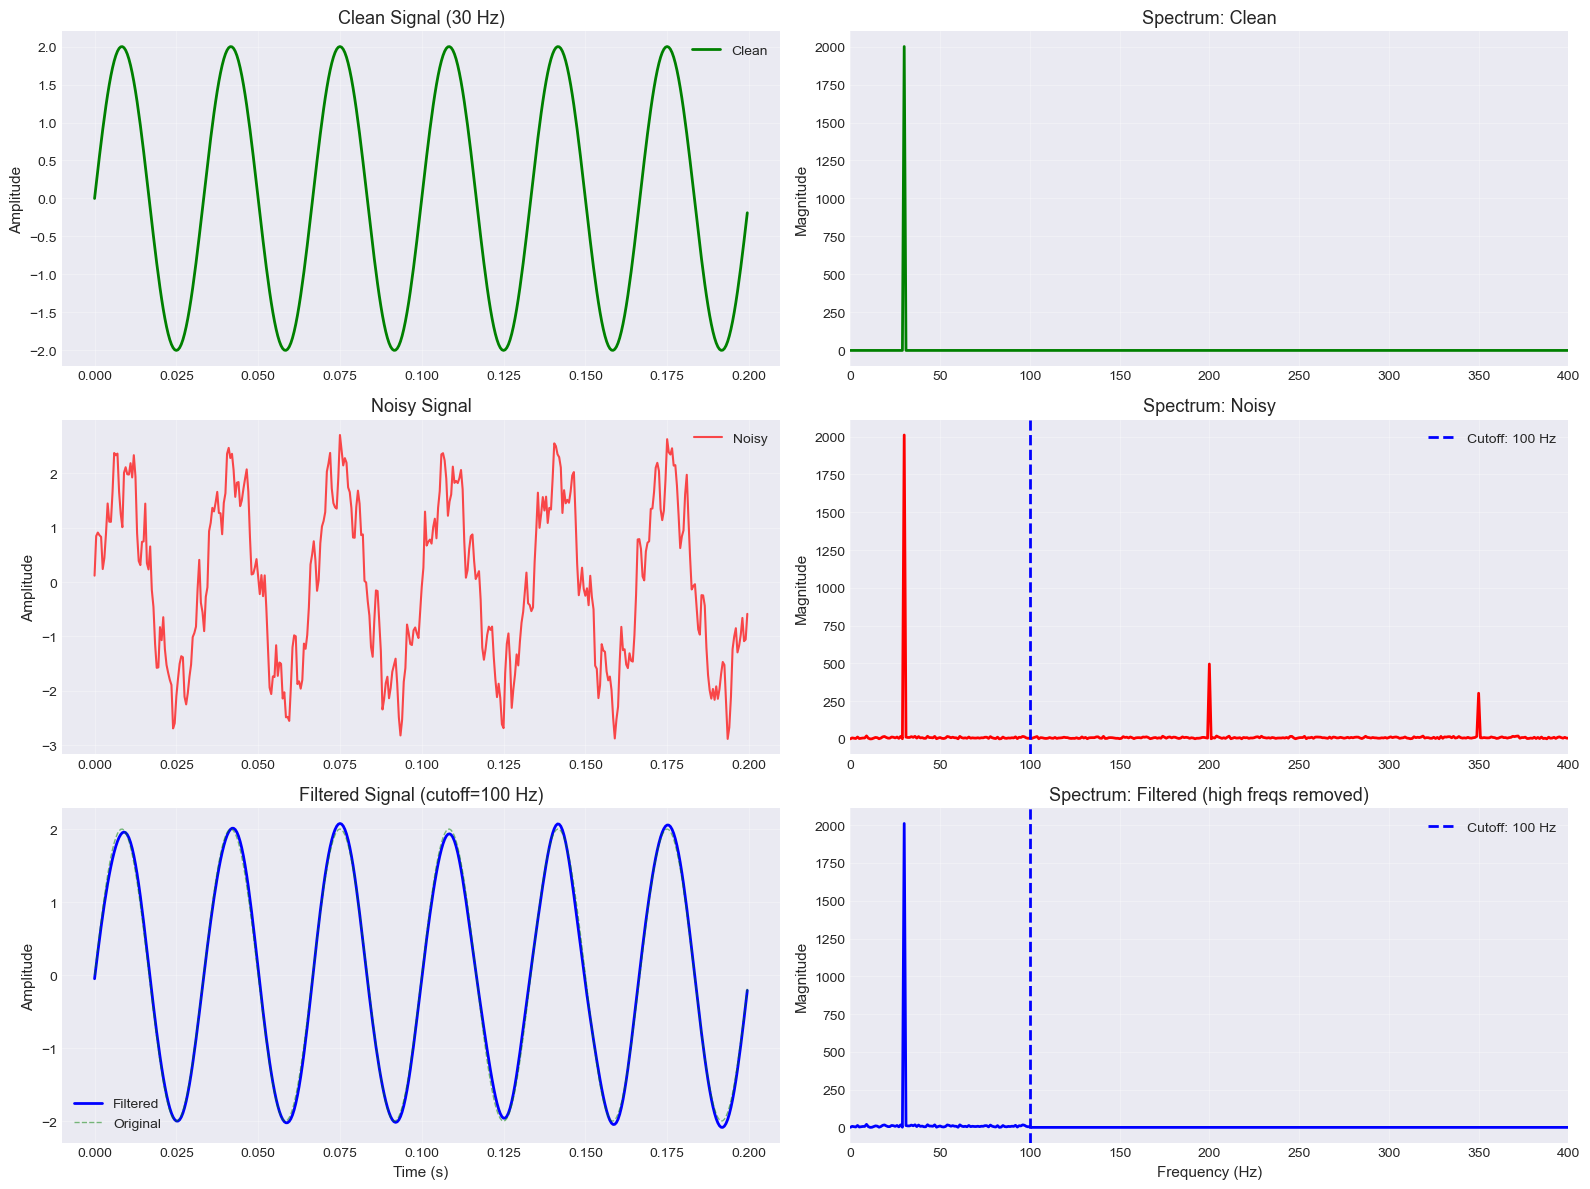


Low-pass filter successfully removes high-frequency noise!


In [6]:
# Create signal: clean sine + high-frequency noise
sample_rate = 2000
t = np.linspace(0, 1, sample_rate, endpoint=False)

# Clean signal: 30 Hz
clean_signal = 2 * np.sin(2*np.pi*30*t)

# Noise: high frequencies
noise = (0.5 * np.sin(2*np.pi*200*t) + 
         0.3 * np.sin(2*np.pi*350*t) +
         0.2 * np.random.randn(len(t)))

# Noisy signal
noisy_signal = clean_signal + noise

# FFT
fft_noisy = fft.fft(noisy_signal)
freqs = fft.fftfreq(len(noisy_signal), 1/sample_rate)

# Low-pass filter: keep frequencies below cutoff
cutoff_freq = 100  # Hz
fft_filtered = fft_noisy.copy()
fft_filtered[np.abs(freqs) > cutoff_freq] = 0

# IFFT to get filtered signal
filtered_signal = fft.ifft(fft_filtered).real

# Calculate improvement
noise_before = np.std(noisy_signal - clean_signal)
noise_after = np.std(filtered_signal - clean_signal)
improvement = noise_before / noise_after

print("Low-Pass Filtering")
print(f"  Clean signal: 2×sin(2π×30t) [30 Hz]")
print(f"  Noise: 200 Hz + 350 Hz + random")
print(f"  Cutoff frequency: {cutoff_freq} Hz")
print(f"\nNoise level (std dev):")
print(f"  Before filtering: {noise_before:.4f}")
print(f"  After filtering: {noise_after:.4f}")
print(f"  Improvement: {improvement:.1f}x reduction")

# Plot
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Time domain plots
axes[0,0].plot(t[:400], clean_signal[:400], 'g-', linewidth=2, label='Clean')
axes[0,0].set_ylabel('Amplitude', fontsize=11)
axes[0,0].set_title('Clean Signal (30 Hz)', fontsize=13)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[1,0].plot(t[:400], noisy_signal[:400], 'r-', linewidth=1.5, alpha=0.7, label='Noisy')
axes[1,0].set_ylabel('Amplitude', fontsize=11)
axes[1,0].set_title('Noisy Signal', fontsize=13)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

axes[2,0].plot(t[:400], filtered_signal[:400], 'b-', linewidth=2, label='Filtered')
axes[2,0].plot(t[:400], clean_signal[:400], 'g--', linewidth=1, alpha=0.5, label='Original')
axes[2,0].set_xlabel('Time (s)', fontsize=11)
axes[2,0].set_ylabel('Amplitude', fontsize=11)
axes[2,0].set_title(f'Filtered Signal (cutoff={cutoff_freq} Hz)', fontsize=13)
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)

# Frequency domain plots
N = len(noisy_signal)
axes[0,1].plot(freqs[:N//2], np.abs(fft.fft(clean_signal))[:N//2], 'g-', linewidth=2)
axes[0,1].set_ylabel('Magnitude', fontsize=11)
axes[0,1].set_title('Spectrum: Clean', fontsize=13)
axes[0,1].set_xlim(0, 400)
axes[0,1].grid(True, alpha=0.3)

axes[1,1].plot(freqs[:N//2], np.abs(fft_noisy)[:N//2], 'r-', linewidth=2)
axes[1,1].axvline(cutoff_freq, color='blue', linestyle='--', linewidth=2, 
                  label=f'Cutoff: {cutoff_freq} Hz')
axes[1,1].set_ylabel('Magnitude', fontsize=11)
axes[1,1].set_title('Spectrum: Noisy', fontsize=13)
axes[1,1].set_xlim(0, 400)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

axes[2,1].plot(freqs[:N//2], np.abs(fft_filtered)[:N//2], 'b-', linewidth=2)
axes[2,1].axvline(cutoff_freq, color='blue', linestyle='--', linewidth=2,
                  label=f'Cutoff: {cutoff_freq} Hz')
axes[2,1].set_xlabel('Frequency (Hz)', fontsize=11)
axes[2,1].set_ylabel('Magnitude', fontsize=11)
axes[2,1].set_title('Spectrum: Filtered (high freqs removed)', fontsize=13)
axes[2,1].set_xlim(0, 400)
axes[2,1].legend()
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nLow-pass filter successfully removes high-frequency noise!")

## Power Spectral Density (PSD)

**Definition**: Power (energy) per frequency unit

\[ \text{PSD} = |X_k|^2 \]

**Interpretation**:
- Shows distribution of signal power across frequencies
- Units: power/Hz
- Emphasizes dominant frequencies

**One-sided vs Two-sided**:
- Two-sided: -f_max to +f_max
- One-sided: 0 to +f_max (for real signals)

**Applications**: Vibration analysis, signal characterization, noise measurement

Power Spectral Density Analysis

Signal components:
  Strong:  3.0 × sin(2π×20t)   [20 Hz]
  Medium:  1.5 × sin(2π×60t)   [60 Hz]
  Weak:    0.5 × sin(2π×150t)  [150 Hz]
  Plus white noise (σ=0.3)

Detected frequency peaks (by power):
  1. 20.0 Hz (PSD: 9005.0)
  2. 60.0 Hz (PSD: 2218.1)
  3. 150.0 Hz (PSD: 250.9)

Total signal power: 11652.6


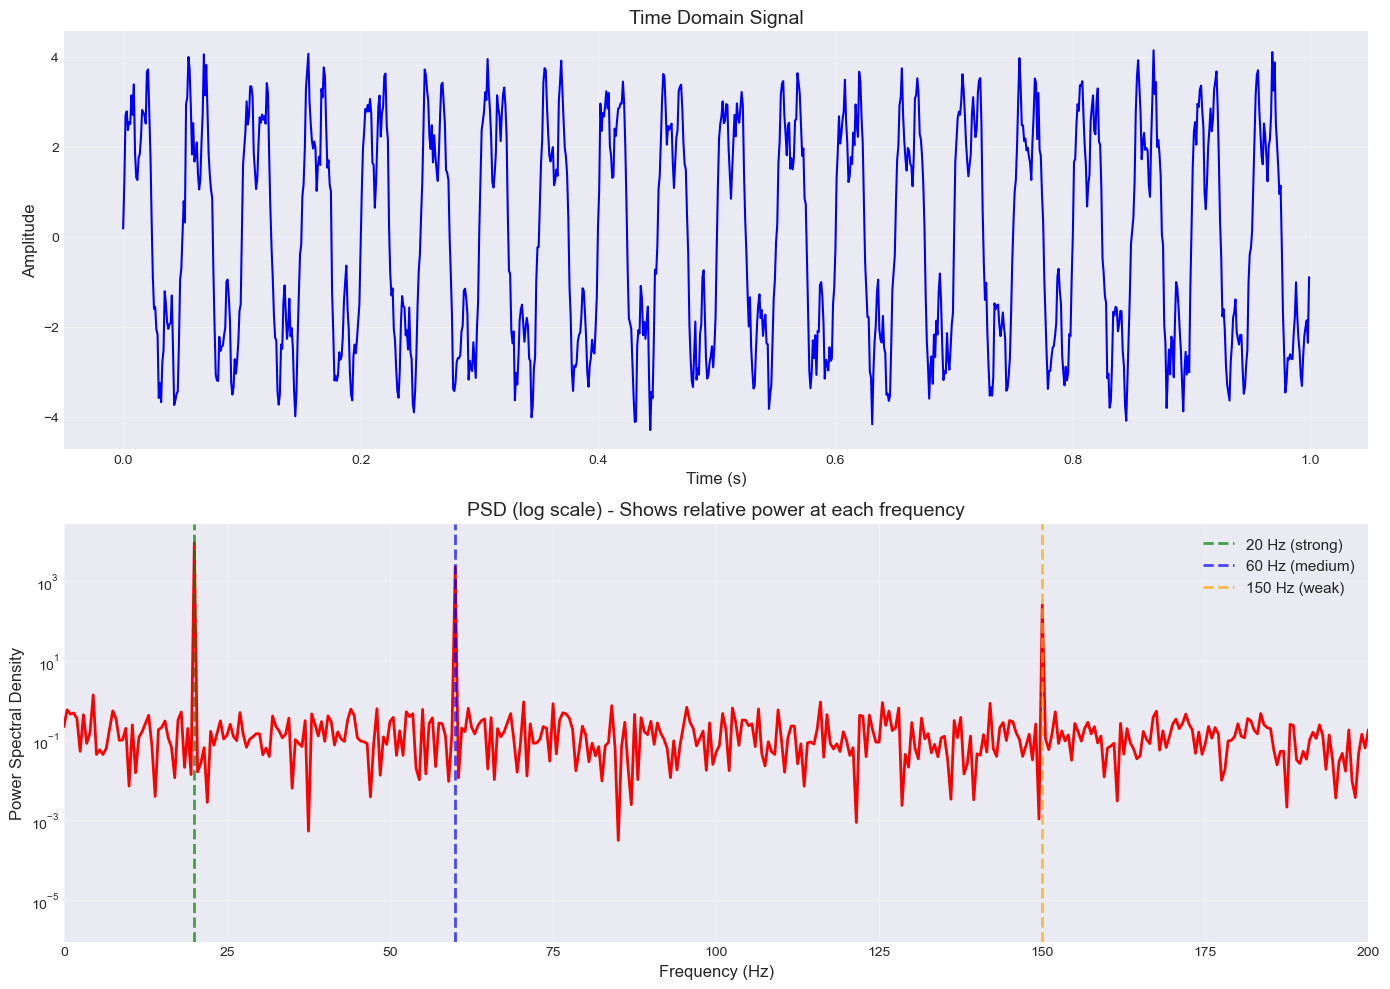


PSD clearly shows power distribution across frequencies!
Log scale reveals weak components that would be invisible in linear scale.


In [7]:
# Generate signal with multiple components
sample_rate = 1000
t = np.linspace(0, 2, 2*sample_rate, endpoint=False)

# Signal components with different amplitudes
signal = (3.0 * np.sin(2*np.pi*20*t) +   # Strong 20 Hz
          1.5 * np.sin(2*np.pi*60*t) +   # Medium 60 Hz
          0.5 * np.sin(2*np.pi*150*t))   # Weak 150 Hz

# Add white noise
signal += 0.3 * np.random.randn(len(t))

# Compute FFT
fft_result = fft.fft(signal)
N = len(signal)
freqs = fft.fftfreq(N, 1/sample_rate)

# Power Spectral Density
psd = np.abs(fft_result)**2 / N  # Normalize by N

# One-sided PSD (for real signals)
psd_onesided = 2 * psd[:N//2]  # Factor of 2 for one-sided
freqs_onesided = freqs[:N//2]

print("Power Spectral Density Analysis")
print(f"\nSignal components:")
print(f"  Strong:  3.0 × sin(2π×20t)   [20 Hz]")
print(f"  Medium:  1.5 × sin(2π×60t)   [60 Hz]")
print(f"  Weak:    0.5 × sin(2π×150t)  [150 Hz]")
print(f"  Plus white noise (σ=0.3)")

# Find peaks
from scipy.signal import find_peaks
peaks, properties = find_peaks(psd_onesided, height=10, distance=20)
peak_freqs = freqs_onesided[peaks]
peak_powers = psd_onesided[peaks]

# Sort by power
sorted_idx = np.argsort(peak_powers)[::-1]
print(f"\nDetected frequency peaks (by power):")
for i, idx in enumerate(sorted_idx[:3], 1):
    freq = peak_freqs[idx]
    power = peak_powers[idx]
    print(f"  {i}. {freq:.1f} Hz (PSD: {power:.1f})")

# Total power
total_power = np.sum(psd_onesided)
print(f"\nTotal signal power: {total_power:.1f}")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Time domain
axes[0].plot(t[:1000], signal[:1000], 'b-', linewidth=1.5)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].set_title('Time Domain Signal', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Power Spectral Density
axes[1].semilogy(freqs_onesided, psd_onesided, 'r-', linewidth=2)
axes[1].axvline(20, color='green', linestyle='--', alpha=0.7, linewidth=2, label='20 Hz (strong)')
axes[1].axvline(60, color='blue', linestyle='--', alpha=0.7, linewidth=2, label='60 Hz (medium)')
axes[1].axvline(150, color='orange', linestyle='--', alpha=0.7, linewidth=2, label='150 Hz (weak)')
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Power Spectral Density', fontsize=12)
axes[1].set_title('PSD (log scale) - Shows relative power at each frequency', fontsize=14)
axes[1].set_xlim(0, 200)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print("\nPSD clearly shows power distribution across frequencies!")
print("Log scale reveals weak components that would be invisible in linear scale.")

## Summary

### Key Functions:

```python
from scipy import fft

# Forward FFT
fft_result = fft.fft(signal)

# Inverse FFT
signal = fft.ifft(fft_result)

# Frequency array
freqs = fft.fftfreq(n, d=1/sample_rate)

# Magnitude
magnitude = np.abs(fft_result)
```

### Important Concepts:

✓ **Nyquist frequency**: f_max = sample_rate / 2  
✓ **Frequency resolution**: Δf = sample_rate / N  
✓ **FFT symmetry**: Real signals have symmetric spectra  
✓ **One-sided spectrum**: Use positive frequencies only  
✓ **Power = |X|²**: Energy at each frequency  

### Workflow:

1. **Analysis**: signal → FFT → frequency domain
2. **Filtering**: modify frequency components
3. **Synthesis**: IFFT → filtered signal

### Applications:
- Audio analysis (music, speech)
- Signal filtering (noise reduction)
- Compression (keep important frequencies)
- Vibration analysis
- Medical signals (ECG, EEG)